# Machine Learning - 2😍😍

## Minakov Nikita / CSSE1707-DA3/ 2020
## Lab #4 SVM

### Welcome to my diamonds analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

#### Import the dataset

In [3]:
dataset = pd.read_csv('diamonds.csv', )

In [4]:
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
dataset.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


___________________________________________

 ### I will use only Ideal and Very good cut's of diamnond. Unneeded will be dropped

In [6]:
dataset.cut.value_counts().sort_index()

Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
Name: cut, dtype: int64

In [7]:
dataset = dataset[dataset.cut!='Fair'] 
dataset = dataset[dataset.cut!='Good'] 
dataset = dataset[dataset.cut!='Premium'] 

In [8]:
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


'Very Good': 0, 
'Ideal': 1

In [9]:
mapping = {'Very Good': 0, 'Ideal': 1}
dataset = dataset.replace({'cut': mapping})

__________________


#### Preparation of dataset

In [10]:
X = dataset.loc[:,['carat','depth', 'table', 'price', 'x', 'y', 'z']].values

In [11]:
X

array([[ 0.23, 61.5 , 55.  , ...,  3.95,  3.98,  2.43],
       [ 0.24, 62.8 , 57.  , ...,  3.94,  3.96,  2.48],
       [ 0.24, 62.3 , 57.  , ...,  3.95,  3.98,  2.47],
       ...,
       [ 0.72, 60.8 , 57.  , ...,  5.75,  5.76,  3.5 ],
       [ 0.7 , 62.8 , 60.  , ...,  5.66,  5.68,  3.56],
       [ 0.75, 62.2 , 55.  , ...,  5.83,  5.87,  3.64]])

In [12]:
len(X)

33633

In [13]:
y = dataset.iloc[:,2].values

In [14]:
y

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [15]:
len(y)

33633

________________________________________________________

In [16]:
X

array([[ 0.23, 61.5 , 55.  , ...,  3.95,  3.98,  2.43],
       [ 0.24, 62.8 , 57.  , ...,  3.94,  3.96,  2.48],
       [ 0.24, 62.3 , 57.  , ...,  3.95,  3.98,  2.47],
       ...,
       [ 0.72, 60.8 , 57.  , ...,  5.75,  5.76,  3.5 ],
       [ 0.7 , 62.8 , 60.  , ...,  5.66,  5.68,  3.56],
       [ 0.75, 62.2 , 55.  , ...,  5.83,  5.87,  3.64]])

In [17]:
from sklearn.preprocessing import LabelEncoder

labelEncoderY = LabelEncoder()
y = labelEncoderY.fit_transform(y)
y

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

________________________________________________________________________________________


#### Spliting the dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [20]:
X_train.shape

(26906, 7)

In [21]:
X_test.shape

(6727, 7)

In [22]:
y_train.shape

(26906,)

In [23]:
y_test.shape

(6727,)

In [24]:
import seaborn as sns

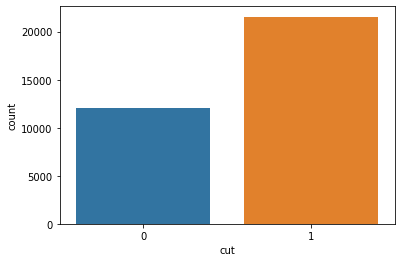

In [25]:
sns.countplot(dataset.cut)

Not crirtical difference for my 'y' values column 

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn_cls = KNeighborsClassifier()

In [28]:
knn_cls.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
y_preds = knn_cls.predict(X_test)

In [30]:
for i, j in zip(y_test, y_preds):
    print(i, ":" ,j)

0 : 1
0 : 1
1 : 0
1 : 1
0 : 0
0 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 0
1 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 0
0 : 1
1 : 1
0 : 0
0 : 0
1 : 1
0 : 0
0 : 1
1 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 0
1 : 0
1 : 1
0 : 0
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 0
1 : 1
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 0
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 1
1 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 0
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 0
1 : 1
1 : 1
0 : 1
0 : 0
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 1
0 : 1
0 : 0
1 : 0
1 : 0
0 : 1
1 : 1
1 : 1
0 : 0
0 : 0
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
0 : 1
0 : 0
1 : 1
1 : 1
1 : 0
1 : 1
1 : 0
1 : 1
0 : 1
1 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 1
0 : 0
1 : 

1 : 1
1 : 1
1 : 1
1 : 1
1 : 0
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
0 : 1
0 : 0
0 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
0 : 0
1 : 1
0 : 1
1 : 1
0 : 1
0 : 0
1 : 1
1 : 1
0 : 1
0 : 0
1 : 1
0 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 0
1 : 0
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 1
0 : 1
1 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 0
1 : 1
0 : 1
0 : 0
0 : 0
1 : 1
1 : 1
0 : 1
1 : 0
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 1
1 : 1
1 : 1
1 : 0
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 0
1 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 0
0 : 0
1 : 1
0 : 0
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 0
0 : 0
1 : 1
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 0
1 : 1
1 : 1
0 : 1
0 : 0
1 : 1
1 : 0
0 : 0
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 

0 : 0
0 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
0 : 0
1 : 1
1 : 0
1 : 1
1 : 1
1 : 0
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
0 : 1
0 : 0
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
0 : 1
1 : 0
1 : 1
1 : 1
1 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 0
1 : 1
0 : 1
1 : 1
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 0
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
0 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 0
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
0 : 1
0 : 0
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
0 : 1
1 : 1
1 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 0
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
0 : 0
1 : 0
1 : 1
1 : 0
0 : 1
1 : 1
0 : 1
1 : 1
1 : 1
0 : 

0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 1
1 : 1
1 : 0
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
0 : 1
0 : 1
0 : 1
1 : 1
1 : 1
0 : 0
0 : 0
0 : 0
1 : 0
1 : 1
1 : 1
0 : 1
1 : 0
0 : 0
0 : 1
1 : 1
0 : 1
0 : 0
0 : 1
1 : 1
1 : 1
0 : 0
0 : 1
1 : 1
1 : 0
1 : 0
1 : 0
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
0 : 1
1 : 1
0 : 0
0 : 1
1 : 0
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
1 : 1
1 : 0
1 : 1
1 : 0
0 : 1
1 : 1
1 : 1
1 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 0
1 : 1
0 : 1
0 : 1
1 : 0
0 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 1
0 : 0
1 : 1
0 : 0
1 : 1
0 : 1
1 : 1
0 : 0
0 : 1
1 : 1
0 : 1
0 : 1
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
0 : 1
1 : 0
0 : 1
0 : 0
1 : 1
1 : 1
0 : 1
1 : 1
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
0 : 1
0 : 0
1 : 1
1 : 1
0 : 1
0 : 0
0 : 

1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 1
0 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 1
0 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 0
0 : 1
1 : 1
0 : 1
0 : 0
1 : 0
0 : 1
0 : 0
1 : 0
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 0
1 : 1
1 : 0
0 : 0
1 : 0
0 : 1
1 : 1
0 : 1
1 : 0
0 : 0
1 : 1
1 : 1
0 : 1
0 : 1
1 : 1
0 : 1
1 : 1
0 : 1
0 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 0
1 : 1
1 : 1
1 : 0
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 0
0 : 0
1 : 1
1 : 1
0 : 0
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 0
1 : 0
0 : 1
1 : 1
0 : 1
0 : 0
0 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
0 : 0
0 : 1
1 : 1
0 : 1
1 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
0 : 1
1 : 0
0 : 0
0 : 0
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 0
0 : 0
0 : 0
0 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 1
0 : 0
1 : 0
1 : 1
1 : 1
1 : 0
0 : 1
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 0
0 : 

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [32]:
accuracy_score(y_test, y_preds)

0.7327188940092166

In [33]:
confusion_matrix(y_test, y_preds)

array([[1124, 1293],
       [ 505, 3805]], dtype=int64)

In [34]:
precision_score(y_test, y_preds)

0.7463711259317379

In [35]:
recall_score(y_test, y_preds)

0.882830626450116

In [36]:
print(classification_report(y_test, y_preds, target_names=['Very Good','Ideal']))

              precision    recall  f1-score   support

   Very Good       0.69      0.47      0.56      2417
       Ideal       0.75      0.88      0.81      4310

    accuracy                           0.73      6727
   macro avg       0.72      0.67      0.68      6727
weighted avg       0.73      0.73      0.72      6727



In [37]:
2* ((0.75*0.88)/(0.75+0.88))

0.8098159509202455

In [38]:
2* ((0.69*0.47)/(0.69+0.47))

0.5591379310344827

As a result of the analysis and the construction of the model, the result obtained is not bad enough to predict what type Diamond belongs to by its input parameters.

The prediction of a ideal diamond is more accurate than very good.

_________________________________________________________________________________

 ## LogReg algorithm 

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\asus.VENIK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the test set results and calculating the accuracy

In [40]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1152 1228]
 [ 250 4097]]


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.48      0.61      2380
           1       0.77      0.94      0.85      4347

    accuracy                           0.78      6727
   macro avg       0.80      0.71      0.73      6727
weighted avg       0.79      0.78      0.76      6727



### ROC Curve

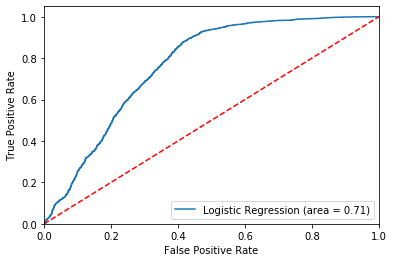

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

______________________________________________________________________

## SVM algorithm

In [68]:
dataset_samp = dataset.sample(1000)
dataset_samp.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
7938,7939,1.05,0,G,SI2,63.2,54.0,4318,6.52,6.49,4.11
1917,1918,0.91,0,H,SI1,63.4,55.0,3082,6.18,6.15,3.91
13860,13861,1.00,0,D,SI1,63.1,56.0,5645,6.34,6.30,3.99
40138,40139,0.70,0,G,I1,63.1,56.0,1115,5.60,5.51,3.51
11060,11061,0.34,1,D,SI1,60.9,56.0,596,4.53,4.56,2.76


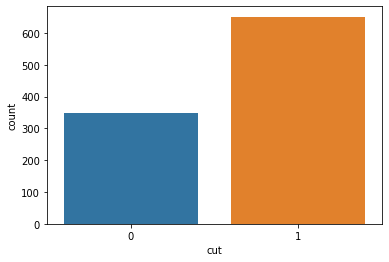

In [69]:
sns.countplot(dataset_samp.cut)

In [45]:
X = dataset_samp.drop('Unnamed: 0', axis=1)
X = X.drop('color', axis=1)
X = X.drop('clarity', axis=1)
X = X.drop('cut', axis=1)
X.head()

,carat,depth,table,price,x,y,z
15624,1.01,61.4,59.0,6270,6.37,6.43,3.93
34537,0.33,62.1,55.0,868,4.41,4.44,2.75
7995,0.82,62.4,54.0,4327,5.99,6.02,3.75
21049,0.31,62.2,55.0,625,4.35,4.36,2.71
10791,1.07,62.6,61.0,4861,6.42,6.49,4.04


In [46]:
#X = dataset.loc[:,['carat','depth', 'table', 'price', 'x', 'y', 'z']].values
#X

In [47]:
y = dataset_samp['cut']

In [48]:
len(y)
len(X)

1000

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Linear Kernel

In [50]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')

In [51]:
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [52]:
y_pred = svclassifier.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 46  25]
 [ 25 104]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        71
           1       0.81      0.81      0.81       129

    accuracy                           0.75       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.75      0.75      0.75       200



________________________________________________________________

### Gaussian Kernel

In [50]:
X = dataset.drop('Unnamed: 0', axis=1)
X = X.drop('color', axis=1)
X = X.drop('clarity', axis=1)
X = X.drop('cut', axis=1)
X.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
5,0.24,62.8,57.0,336,3.94,3.96,2.48
6,0.24,62.3,57.0,336,3.95,3.98,2.47
7,0.26,61.9,55.0,337,4.07,4.11,2.53
9,0.23,59.4,61.0,338,4.00,4.05,2.39


In [53]:
y = dataset1['cut']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [57]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')

In [58]:
from sklearn.svm import SVC
svclassifier.fit(X_train, y_train)

C:\Users\asus.VENIK\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [59]:
y_pred = svclassifier.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1222 1261]
 [ 481 3763]]
              precision    recall  f1-score   support

           0       0.72      0.49      0.58      2483
           1       0.75      0.89      0.81      4244

    accuracy                           0.74      6727
   macro avg       0.73      0.69      0.70      6727
weighted avg       0.74      0.74      0.73      6727



### Sigmoid Kernel

In [61]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')


In [62]:
svclassifier.fit(X_train, y_train)

C:\Users\asus.VENIK\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [66]:
y_pred = svclassifier.predict(X_test)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0 2483]
 [   0 4244]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2483
           1       0.63      1.00      0.77      4244

    accuracy                           0.63      6727
   macro avg       0.32      0.50      0.39      6727
weighted avg       0.40      0.63      0.49      6727



C:\Users\asus.VENIK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


C:\Users\asus.VENIK\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\asus.VENIK\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


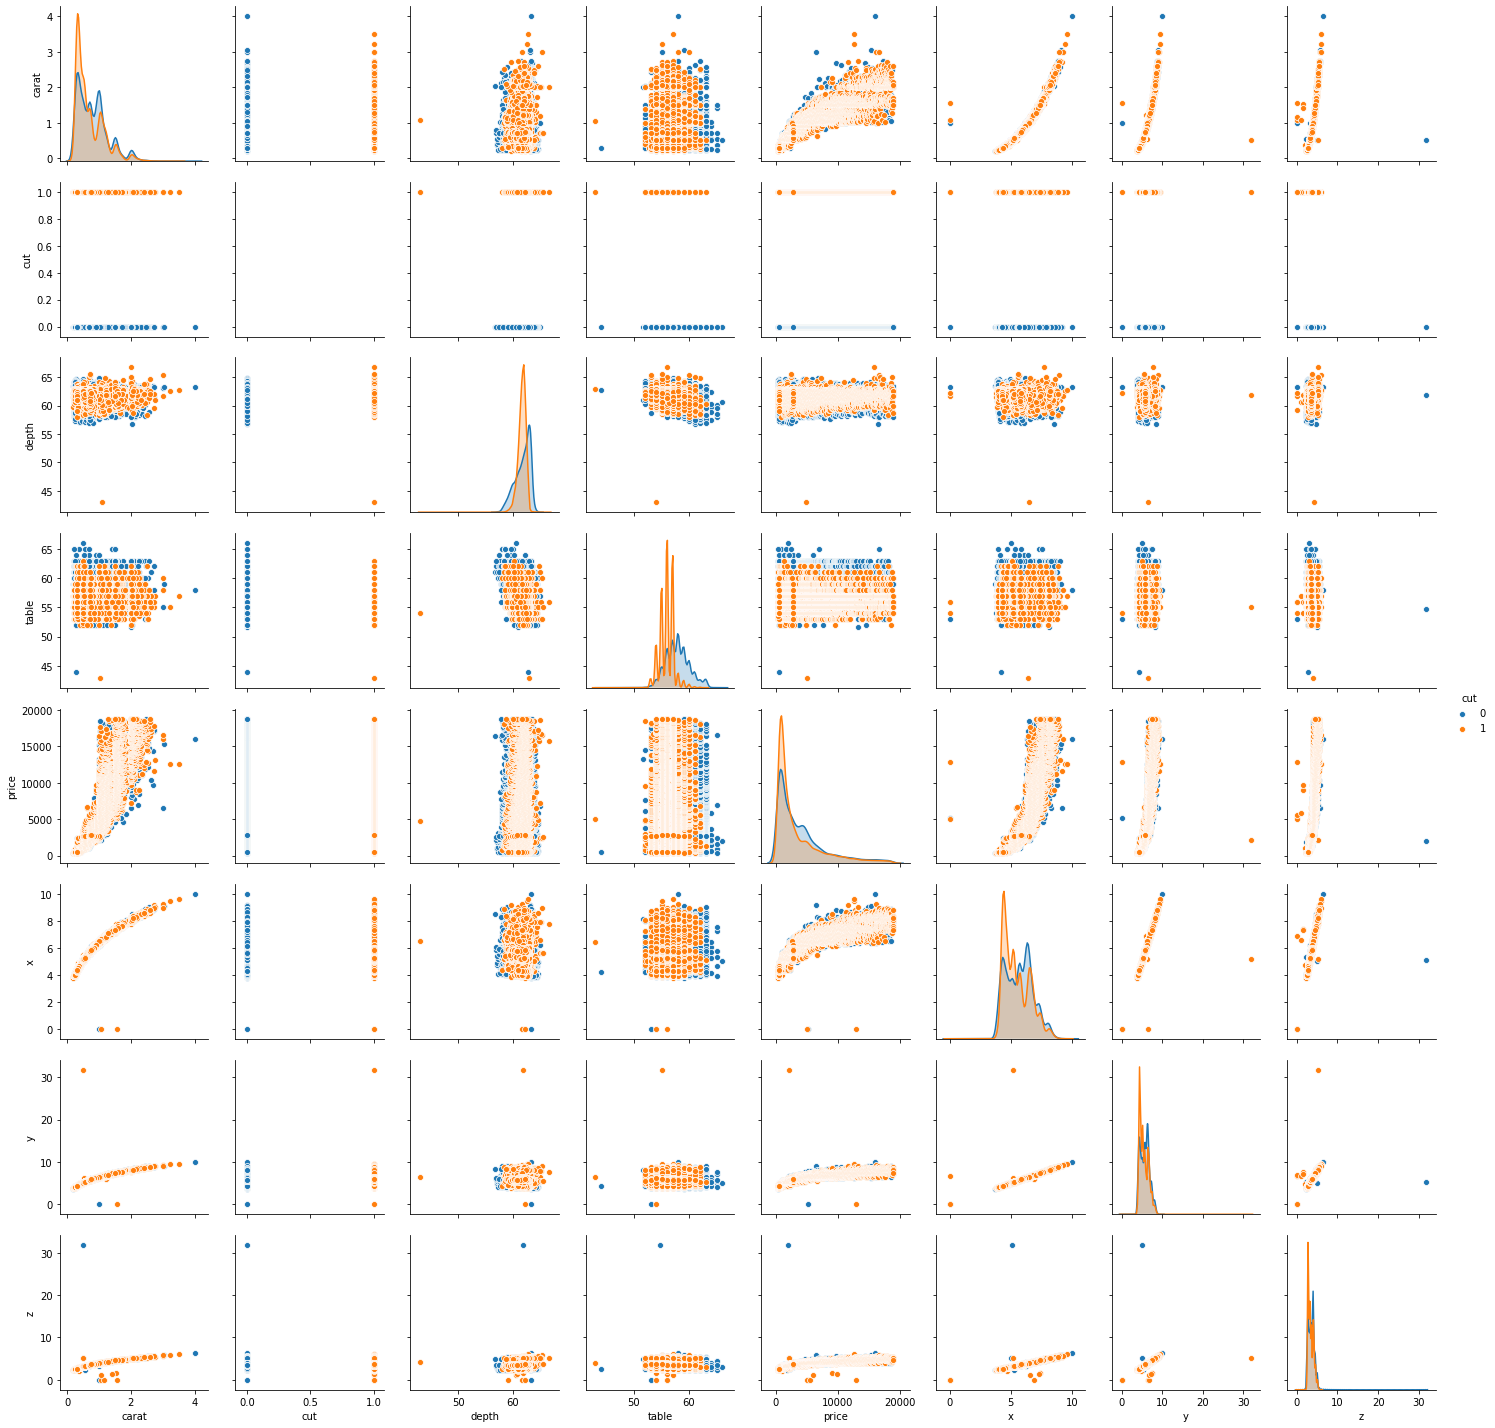

In [48]:
sns.pairplot(dataset1, hue='cut')

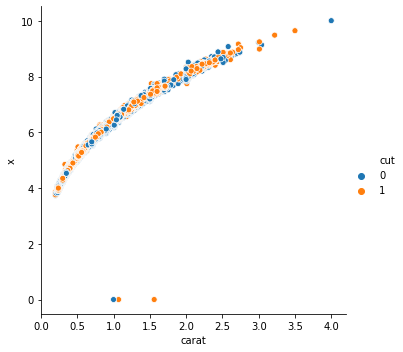

In [71]:
g = sns.relplot(x="carat", y="x", hue="cut", data=dataset1)

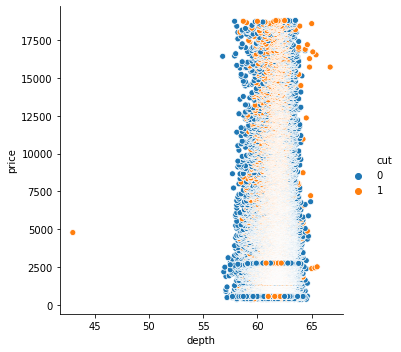

In [72]:
g = sns.relplot(x="depth", y="price", hue="cut", data=dataset1)

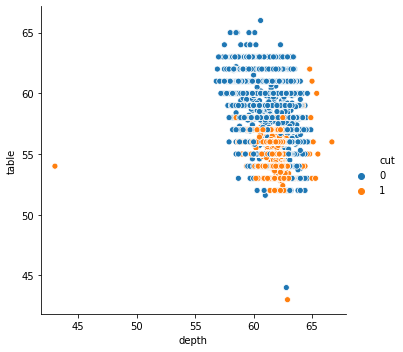

In [73]:
g = sns.relplot(x="depth", y="table", hue="cut", data=dataset1)

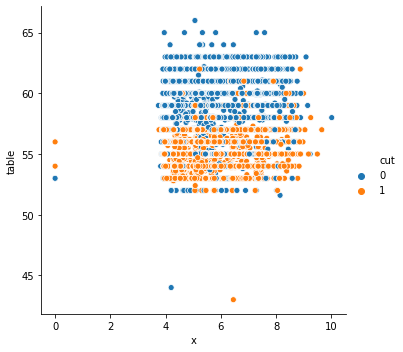

In [74]:
g = sns.relplot(x="x", y="table", hue="cut", data=dataset1)

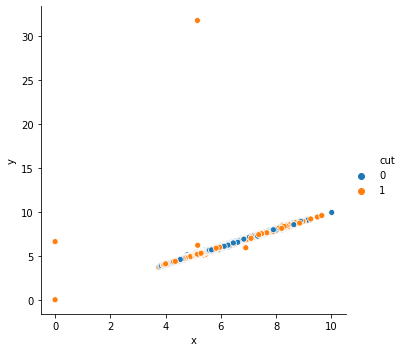

In [76]:
g = sns.relplot(x="x", y="y", hue="cut", data=dataset1)

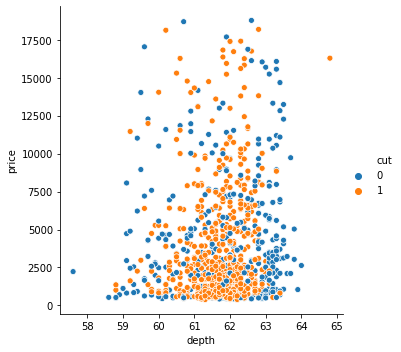

In [80]:
g = sns.relplot(x="depth", y="price", hue="cut", data=dataset_samp)

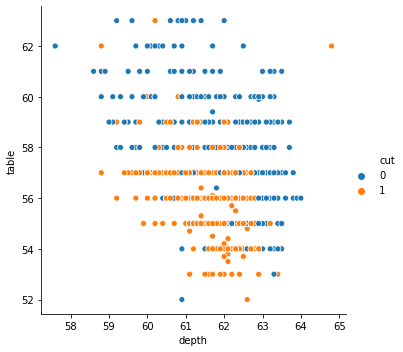

In [81]:
g = sns.relplot(x="depth", y="table", hue="cut", data=dataset_samp)

_________________________________________________________________________________________

### Naive Bayes

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [25]:
gnb = GaussianNB()

In [26]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [27]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 6727 points : 1478


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
print(classification_report(y_test, y_pred, target_names=['Very Good','Ideal']))

              precision    recall  f1-score   support

   Very Good       0.73      0.62      0.67      2417
       Ideal       0.80      0.87      0.84      4310

    accuracy                           0.78      6727
   macro avg       0.77      0.75      0.75      6727
weighted avg       0.78      0.78      0.78      6727



In [32]:
accuracy_score(y_test, y_pred)

0.7802883900698677

In [34]:
confusion_matrix(y_test, y_pred)

array([[1502,  915],
       [ 563, 3747]], dtype=int64)

In [36]:
precision_score(y_test, y_pred)

0.8037323037323038

In [38]:
recall_score(y_test, y_pred)

0.8693735498839907

Comparing the results of the constructed models, a clear preponderance of the accuracy of prediction towards ideal diamonds is visible. A particularly accurate Recall is seen in a model with logical regression. Naive Bayes also show high results. Logical regression shows the highest indicator by pregeneration, but at the same time, the recol indicator is much worse than other models. We can conclude that, depending on the necessary prediction, you need to choose the appropriate model.

### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

In [65]:
y_pred = tree.fit(X_train, y_train).predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
print(classification_report(y_test, y_pred, target_names=['Very Good','Ideal']))

              precision    recall  f1-score   support

   Very Good       0.74      0.76      0.75      2417
       Ideal       0.86      0.85      0.86      4310

    accuracy                           0.82      6727
   macro avg       0.80      0.80      0.80      6727
weighted avg       0.82      0.82      0.82      6727



In [73]:
precision_score(y_test, y_pred)

0.863133097762073

In [74]:
recall_score(y_test, y_pred)

0.8501160092807425

In [67]:
from sklearn.metrics import roc_auc_score

roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.8048676860636232

The construction of this model gave a more accurate and even result for both indicators of our model, both for “good” and for “ideal” diamonds.

### Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [76]:
y_pred = model.fit(X_train, y_train).predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
print(classification_report(y_test, y_pred, target_names=['Very Good','Ideal']))

              precision    recall  f1-score   support

   Very Good       0.85      0.77      0.81      2417
       Ideal       0.88      0.92      0.90      4310

    accuracy                           0.87      6727
   macro avg       0.86      0.85      0.85      6727
weighted avg       0.87      0.87      0.87      6727



In [78]:
precision_score(y_test, y_pred)

0.87862038470042

In [79]:
recall_score(y_test, y_pred)

0.9220417633410672

In [57]:
from sklearn.metrics import roc_auc_score

roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.8460022635488953

The final testing ROC AUC for the random forest was 0.84 compared to 0.80 for the single decision tree with an unlimited max depth.

Although the random forest overfits (doing better on the training data than on the testing data), it is able to generalize much better to the testing data than the single decision tree. The random forest has lower variance (good) while maintaining the same low bias (also good) of a decision tree.

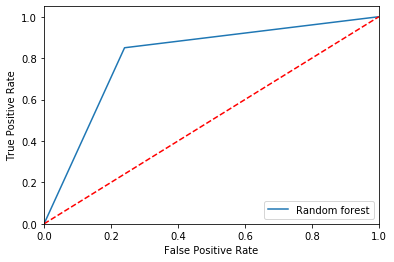

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Random forest')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()